In [15]:
# ! pip install ddaclient>=1.1.6
import ddaclient

ddac = ddaclient.RemoteDDA(service_url="private=https://dda-interface-private.obsuks1.unige.ch,public=http://dda-interface-public.obsuks1.unige.ch", 
                           ddcache_root_local="/data/reduced/ddcache",
                        #    ddcache_root_local="/mnt/sshfs/lesta/projects/astro/integral/data/reduced/ddcache-public-usr_astro_in-p1"
                           )

In [16]:
# oda:version "v0.1.0"

In [17]:

from astropy.time import Time
from astropy.coordinates import SkyCoord

T0_isot = "2023-11-15T15:36:21"
T0_ijd = Time(T0_isot, scale='utc').tt.mjd - 51544

src_coord = SkyCoord(149.000901, 69.680130, unit="deg")

# src_coord = SkyCoord.from_name("M82")
source_name = "GRB231115A"
src_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (149.000901, 69.68013)>

In [18]:
from odafunction.executors import default_execute_to_value
from odafunction.func.urifunc import URIipynbFunction, URIValue


# v = default_execute_to_value(URIipynbFunction.from_generic_uri("file:///home/savchenk/grb221009/grbbase.ipynb")(focus_obs_name="total_3p"), valueclass=URIValue, cached=True)

In [19]:
import pandas as pd
import requests
from astropy.coordinates import SkyCoord
from astropy import units as u

src_coord = SkyCoord.from_name('M82')

t1 = "2023-11-15T00:00:00"
t2 = "2023-11-15T23:59:59"

scw_dict_all = pd.DataFrame(requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/scwlist/nrt/{t1}/{t2}?"
             f"ra={src_coord.ra.deg}&dec={src_coord.dec.deg}&radius=15&return_columns=SWID,SW_TYPE,TELAPSE,TSTART,TSTOP").json())

scw_dict_all

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): www.astro.unige.ch:443
DEBUG:urllib3.connectionpool:https://www.astro.unige.ch:443 "GET /mmoda/dispatch-data/gw/timesystem/api/v1.0/scwlist/nrt/2023-11-15T00:00:00/2023-11-15T23:59:59?ra=148.9684583&dec=69.6797028&radius=15&return_columns=SWID,SW_TYPE,TELAPSE,TSTART,TSTOP HTTP/1.1" 200 1580


,SWID,SW_TYPE,TELAPSE,TSTART,TSTOP
0,270900280021,SLEW,1978.001691,8719.233063,8719.255956
1,270900290010,POINTING,800.000690,8719.255956,8719.265216
2,270900290021,SLEW,116.000100,8719.265216,8719.266558
3,270900300010,POINTING,5001.004383,8719.266558,8719.324440
4,270900300020,POINTING,1591.001415,8719.324440,8719.342854
5,270900300031,SLEW,136.000122,8719.342854,8719.344429
6,270900310010,POINTING,3568.003155,8719.344429,8719.385725
7,270900310021,SLEW,131.000116,8719.385725,8719.387241
8,270900320010,POINTING,3574.003148,8719.387241,8719.428607
9,270900320021,SLEW,134.000118,8719.428607,8719.430158


In [20]:
cat = ["SourceCatalog", {"autoversion": True, "catalog": [
            # {"NAME":"SGR 1935+2154", "RA": 293.73200 , "DEC":  21.89672},
            {"NAME":"M82", "RA": src_coord.ra.deg , "DEC":  src_coord.dec.deg}
]}]

In [21]:
rs = {}

for scw in scw_dict_all[scw_dict_all.SW_TYPE.str.strip()=='POINTING'].SWID:
    print(scw)

    if scw not in rs:
        try:
                r = ddac.query(target="ii_light", 
                        prompt_delegate=True,
                        modules=["git://ddosa/staging-1-3", "git://findic/staging-1-3-icversion", "git://ddosa11/staging-1-3", "git://integral_all_private", "git://ii_light", "git://gencat/staging-1-3"],
                        assume=[
                                        f'ddosa.ScWData(input_scwid="{scw}.000")',
                                        'ii_light.TimeBin(use_tbin=0.05)'
                                ],
                        inject=[cat])
                rs[scw] = r
        except ddaclient.AnalysisDelegatedException:
                pass
        except ddaclient.AnalysisException as e:
                print("problem", e)
#     break

INFO:ddaclient:(('modules', 'git://ddosa/staging-1-3,git://findic/staging-1-3-icversion,git://ddosa11/staging-1-3,git://integral_all_private,git://ii_light,git://gencat/staging-1-3'), {})
INFO:ddaclient:(('assume', 'ddosa.ScWData(input_scwid="270900290010.000"),ii_light.TimeBin(use_tbin=0.05)'), {})
INFO:ddaclient:(('service url:', 'https://dda-interface-private.obsuks1.unige.ch'), {})
INFO:ddaclient:(('target:', 'ii_light'), {})
INFO:ddaclient:(('inject:', [['SourceCatalog', {'autoversion': True, 'catalog': [{'NAME': 'M82', 'RA': 148.9684583, 'DEC': 69.6797028}]}]]), {})
INFO:ddaclient:request to pipeline with parameters: {'url': 'https://dda-interface-private.obsuks1.unige.ch/api/v2.0/ii_light', 'params': {'modules': 'git://ddosa,git://ddosa/staging-1-3,git://findic/staging-1-3-icversion,git://ddosa11/staging-1-3,git://integral_all_private,git://ii_light,git://gencat/staging-1-3', 'assume': 'ddosa.ScWData(input_scwid="270900290010.000"),ii_light.TimeBin(use_tbin=0.05)', 'inject': '[[

270900290010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16329
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"270900290010.000\"),ii_light.TimeBin(use_tbin=0.05)","cached_path":["/data/reduced/ddcache/byscw/2709/270900290010.000/ii_light.v0//4fae020f/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits

270900300010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16339
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"270900300010.000\"),ii_light.TimeBin(use_tbin=0.05)","cached_path":["/data/reduced/ddcache/byscw/2709/270900300010.000/ii_light.v0//4fae020f/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits

270900300020


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16338
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"270900300020.000\"),ii_light.TimeBin(use_tbin=0.05)","cached_path":["/data/reduced/ddcache/byscw/2709/270900300020.000/ii_light.v0//4fae020f/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits

270900310010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16337
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"270900310010.000\"),ii_light.TimeBin(use_tbin=0.05)","cached_path":["/data/reduced/ddcache/byscw/2709/270900310010.000/ii_light.v0//4fae020f/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits

270900320010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16329
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"270900320010.000\"),ii_light.TimeBin(use_tbin=0.05)","cached_path":["/data/reduced/ddcache/byscw/2709/270900320010.000/ii_light.v0//4fae020f/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits

270900330010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16338
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"270900330010.000\"),ii_light.TimeBin(use_tbin=0.05)","cached_path":["/data/reduced/ddcache/byscw/2709/270900330010.000/ii_light.v0//4fae020f/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits

270900340010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16335
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"270900340010.000\"),ii_light.TimeBin(use_tbin=0.05)","cached_path":["/data/reduced/ddcache/byscw/2709/270900340010.000/ii_light.v0//4fae020f/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits

270900350010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16340
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"270900350010.000\"),ii_light.TimeBin(use_tbin=0.05)","cached_path":["/data/reduced/ddcache/byscw/2709/270900350010.000/ii_light.v0//4fae020f/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits

270900360010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16327
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"270900360010.000\"),ii_light.TimeBin(use_tbin=0.05)","cached_path":["/data/reduced/ddcache/byscw/2709/270900360010.000/ii_light.v0//4fae020f/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits

270900370010


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16336
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"270900370010.000\"),ii_light.TimeBin(use_tbin=0.05)","cached_path":["/data/reduced/ddcache/byscw/2709/270900370010.000/ii_light.v0//4fae020f/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits

270900370020


DEBUG:urllib3.connectionpool:https://dda-interface-private.obsuks1.unige.ch:443 "POST /api/v2.0/ii_light HTTP/1.1" 200 16334
DEBUG:ddaclient:{"assume":"ddosa.ScWData(input_scwid=\"270900370020.000\"),ii_light.TimeBin(use_tbin=0.05)","cached_path":["/data/reduced/ddcache/byscw/2709/270900370020.000/ii_light.v0//4fae020f/"],"data":{"_da_stored_link_input_binning":"TimeBin","_da_stored_link_input_bins":"ImageBins","_da_stored_link_input_dead":"ibis_dead","_da_stored_link_input_events":"ISGRIEvents","_da_stored_link_input_gti":"ibis_gti","_da_stored_link_input_maps":"BinMapsSpectra","_da_stored_link_input_scw":"ScWData","_da_stored_link_input_spectra":"ii_spectra_extract","abstract":false,"allow_alias":false,"allow_timespent_adjustment":false,"copy_cached_input":true,"datafile_restore_mode":"None","default_log_level":"","essential_deep_inputs":[],"explicit_output":"None","force_complete_input":true,"hard_timespent_checks":false,"incomplete":false,"infactory":true,"lc":["DataFile","lcr.fits

In [22]:
from astropy.time import Time


In [23]:
from astropy.io import fits
import numpy as np
from matplotlib import pylab as plt

d = None

for scw, r in rs.items():
    with fits.open(r.lc) as f:
        for e in f:
            if e.header.get('NAME', '').startswith("M"):
                _ = e.data
                print("found in ", scw)

                if d is None:
                    d = _
                else:
                    d = np.concatenate([d, _])



found in  270900290010
found in  270900300010
found in  270900300020
found in  270900310010
found in  270900320010
found in  270900330010
found in  270900340010
found in  270900350010
found in  270900360010
found in  270900370010
found in  270900370020


Text(0.5, 0, 'time since T$_0$=2023-11-15T15:36:21, days')

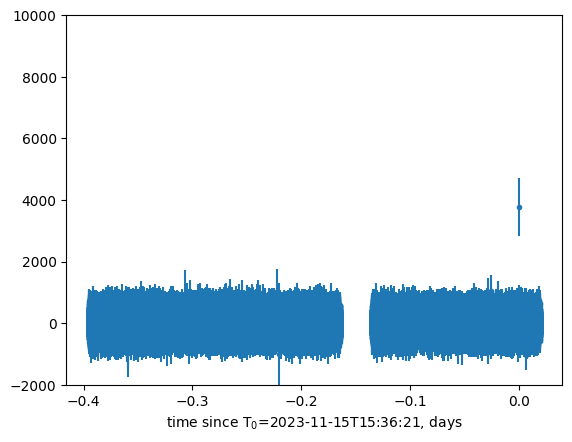

In [24]:

m = d['ERROR'] < 2000
plt.errorbar(d[m]['TIME']-T0_ijd, d[m]['RATE'], d[m]['ERROR'], fmt='.')
plt.ylim(-2000, 10000)

plt.xlabel(f"time since T$_0$={T0_isot}, days")

DEBUG:matplotlib.ticker:vmin 0.5983849604674524 vmax 48239.848771349694
DEBUG:matplotlib.ticker:ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06])
DEBUG:matplotlib.ticker:vmin 0.5983849604674524 vmax 48239.848771349694
DEBUG:matplotlib.ticker:ticklocs array([2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,
       2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03, 8.e+03, 9.e+03,
       2.e+04, 3.e+04, 4.e+04, 5.e+04, 6.e+04, 7.e+04, 8.e+04, 9.e+04,
       2.e+05, 3.e+05, 4.e+05, 5.e+05, 6.e+05, 7.e+05, 8.e+05, 9.e+05,
       2.e+06, 3.e+06, 4.e+06, 5.e+06, 6.e+06, 7.e+06, 8.e+06, 9.e+06])
DEBUG:matplotlib.ticker:vmin 0.5983849604674524 vmax 48239.8487

[]


DEBUG:matplotlib.ticker:vmin 0.5983849604674524 vmax 48239.848771349694
DEBUG:matplotlib.ticker:ticklocs array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06])
DEBUG:matplotlib.ticker:vmin 0.5983849604674524 vmax 48239.848771349694
DEBUG:matplotlib.ticker:ticklocs array([2.e-02, 3.e-02, 4.e-02, 5.e-02, 6.e-02, 7.e-02, 8.e-02, 9.e-02,
       2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01, 7.e-01, 8.e-01, 9.e-01,
       2.e+00, 3.e+00, 4.e+00, 5.e+00, 6.e+00, 7.e+00, 8.e+00, 9.e+00,
       2.e+01, 3.e+01, 4.e+01, 5.e+01, 6.e+01, 7.e+01, 8.e+01, 9.e+01,
       2.e+02, 3.e+02, 4.e+02, 5.e+02, 6.e+02, 7.e+02, 8.e+02, 9.e+02,
       2.e+03, 3.e+03, 4.e+03, 5.e+03, 6.e+03, 7.e+03, 8.e+03, 9.e+03,
       2.e+04, 3.e+04, 4.e+04, 5.e+04, 6.e+04, 7.e+04, 8.e+04, 9.e+04,
       2.e+05, 3.e+05, 4.e+05, 5.e+05, 6.e+05, 7.e+05, 8.e+05, 9.e+05,
       2.e+06, 3.e+06, 4.e+06, 5.e+06, 6.e+06, 7.e+06, 8.e+06, 9.e+06])
DEBUG:matplotlib.ticker:vmin 0.5983849604674524 vmax 48239.8487

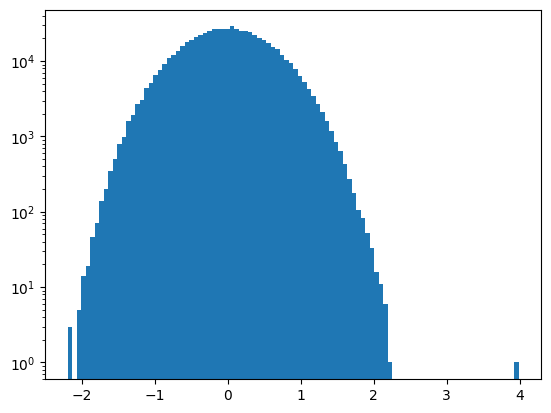

In [25]:
plt.figure()

# plt.plot(d['TIME'] - T0_ijd, d['RATE'])

s = d['RATE']/d['ERROR']

plt.hist(s, 100)
plt.semilogy()
print(s[s>4])


In [26]:
# TODO put response!
ul_1s_ecs = np.nanpercentile(d['ERROR'], 90) * 3 / 300 * 1e-8

In [27]:
ul_1s_ecs

4.040022125244141e-08